<a href="https://colab.research.google.com/github/subbu27iitb/AutoML/blob/main/H2O_Auto_ML_Churn_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Below command is only for GPU
!nvidia-smi

Wed Dec  8 04:41:04 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P8    35W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**Install Java Run time Environment**

In [2]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
default-jre set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
openjdk version "11.0.11" 2021-04-20
OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04)
OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)


**Install, import and initialize H2O cluster**

In [3]:
!pip install h2o

     |████████████████████████████████| 175.8 MB 35 kB/s 
  Created wheel for h2o: filename=h2o-3.34.0.3-py2.py3-none-any.whl size=175832480 sha256=6cb7cf5d11b4ddc84a824e69241379fa9790cffd23202e4b112bdd6458f743b3
  Stored in directory: /root/.cache/pip/wheels/2a/52/cf/01f6938288f0731963463ff72510db67f9f3076f801038b2f7
Successfully built h2o


In [4]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.11" 2021-04-20; OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04); OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpo86sbjlu
  JVM stdout: /tmp/tmpo86sbjlu/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpo86sbjlu/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.34.0.3
H2O_cluster_version_age:,2 months
H2O_cluster_name:,H2O_from_python_unknownUser_tv05ds
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [5]:
from h2o.automl import H2OAutoML
churn_df = h2o.import_file('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [9]:
churn_df.describe()

Rows:7043
Cols:21




,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
type,string,enum,int,enum,enum,int,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,real,real,enum
mins,NaN,,0.0,,,0.0,,,,,,,,,,,,,18.25,18.8,
mean,NaN,,0.1621468124378816,,,32.37114865824223,,,,,,,,,,,,,64.76169246059916,2283.300440841865,
maxs,NaN,,1.0,,,72.0,,,,,,,,,,,,,118.75,8684.8,
sigma,NaN,,0.3686116056100131,,,24.559481023094456,,,,,,,,,,,,,30.090047097678482,2266.771361883145,
zeros,0,,5901,,,11,,,,,,,,,,,,,0,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [8]:
churn_df.types

{'Churn': 'enum',
 'Contract': 'enum',
 'Dependents': 'enum',
 'DeviceProtection': 'enum',
 'InternetService': 'enum',
 'MonthlyCharges': 'real',
 'MultipleLines': 'enum',
 'OnlineBackup': 'enum',
 'OnlineSecurity': 'enum',
 'PaperlessBilling': 'enum',
 'Partner': 'enum',
 'PaymentMethod': 'enum',
 'PhoneService': 'enum',
 'SeniorCitizen': 'int',
 'StreamingMovies': 'enum',
 'StreamingTV': 'enum',
 'TechSupport': 'enum',
 'TotalCharges': 'real',
 'customerID': 'string',
 'gender': 'enum',
 'tenure': 'int'}

In [10]:
churn_train,churn_test,churn_valid = churn_df.split_frame(ratios=[.7, .15])
churn_train

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
9763-GRSKD,Male,0,Yes,Yes,13,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No
7469-LKBCI,Male,0,No,No,16,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.8,No
8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.5,2686.05,No


In [11]:
y = "Churn"
x = churn_df.columns
x.remove(y)
x.remove("customerID")

In [12]:
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "DeepLearning"], verbosity="info", nfolds=0)

In [13]:
aml.train(x = x, y = y, training_frame = churn_train, validation_frame=churn_valid)

AutoML progress: |
04:46:44.554: Project: AutoML_1_20211208_44644
04:46:44.557: Cross-validation disabled by user: no fold column nor nfolds > 1.
04:46:44.568: Setting stopping tolerance adaptively based on the training frame: 0.014222003099714357
04:46:44.568: Build control seed: 10
04:46:44.568: Since cross-validation is disabled, and no leaderboard frame was provided, automatically split the training data into training and leaderboard frames in the ratio 90/10
04:46:44.669: training frame: Frame key: AutoML_1_20211208_44644_training_py_2_sid_88de    cols: 21    rows: 4464  chunks: 8    size: 295340  checksum: 7485517908699667743
04:46:44.669: validation frame: Frame key: py_4_sid_88de    cols: 21    rows: 1069  chunks: 8    size: 139385  checksum: 1117184897375868835
04:46:44.682: leaderboard frame: Frame key: AutoML_1_20211208_44644_leaderboard_py_2_sid_88de    cols: 21    rows: 480  chunks: 8    size: 124579  checksum: 1427393370558774045
04:46:44.682: blending frame: NULL
04:46:4

,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,45.0,45.0,17614.0,6.0,13.0,8.266666,24.0,29.0,26.377777




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.1182226981386081
RMSE: 0.34383527762376
LogLoss: 0.3673184656904132
Mean Per-Class Error: 0.19216544575396255
AUC: 0.8886965909826091
AUCPR: 0.7396311147300536
Gini: 0.7773931819652182

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.34926956490208333: 


,,No,Yes,Error,Rate
0,No,2736.0,531.0,0.1625,(531.0/3267.0)
1,Yes,292.0,905.0,0.2439,(292.0/1197.0)
2,Total,3028.0,1436.0,0.1844,(823.0/4464.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.349270,0.687429,205.0
1,max f2,0.179645,0.789101,286.0
2,max f0point5,0.532557,0.695747,130.0
3,max accuracy,0.496319,0.828853,145.0
4,max precision,0.907865,1.000000,0.0
5,max recall,0.020394,1.000000,384.0
6,max specificity,0.907865,1.000000,0.0
7,max absolute_mcc,0.349270,0.562864,205.0
8,max min_per_class_accuracy,0.301543,0.799499,223.0
9,max mean_per_class_accuracy,0.251184,0.807835,246.0



Gains/Lift Table: Avg response rate: 26.81 %, avg score: 26.78 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010081,0.862493,3.480702,3.480702,0.933333,0.878468,0.933333,0.878468,0.035088,0.035088,248.070175,248.070175,0.034169
1,2,0.020161,0.843297,3.397828,3.439265,0.911111,0.851452,0.922222,0.864960,0.034252,0.069340,239.782790,243.926483,0.067197
2,3,0.031138,0.825432,3.272671,3.380538,0.877551,0.832097,0.906475,0.853375,0.035923,0.105263,227.267147,238.053768,0.101284
3,4,0.040099,0.800940,3.449624,3.395976,0.925000,0.813919,0.910615,0.844558,0.030911,0.136174,244.962406,239.597597,0.131276
4,5,0.050179,0.783941,3.149206,3.346402,0.844444,0.792927,0.897321,0.834186,0.031746,0.167920,214.920635,234.640172,0.160880
5,6,0.100134,0.685700,2.909876,3.128627,0.780269,0.729825,0.838926,0.782122,0.145363,0.313283,190.987559,212.862694,0.291245
6,7,0.150090,0.597008,2.675748,2.977892,0.717489,0.642957,0.798507,0.735803,0.133668,0.446951,167.574767,197.789249,0.405628
7,8,0.200045,0.514763,2.123875,2.764627,0.569507,0.555865,0.741321,0.690869,0.106099,0.553049,112.387471,176.462713,0.482342
8,9,0.299955,0.371374,1.630534,2.386878,0.437220,0.437963,0.640030,0.606630,0.162907,0.715957,63.053373,138.687832,0.568421
9,10,0.400090,0.261900,1.293166,2.113144,0.346756,0.313779,0.566629,0.533335,0.129490,0.845447,29.316580,111.314400,0.608532




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.1325973881625784
RMSE: 0.36413924282144927
LogLoss: 0.40711293280536626
Mean Per-Class Error: 0.21793943383805137
AUC: 0.857856045644064
AUCPR: 0.700996662732729
Gini: 0.7157120912881281

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2475428357721912: 


,,No,Yes,Error,Rate
0,No,568.0,207.0,0.2671,(207.0/775.0)
1,Yes,50.0,244.0,0.1701,(50.0/294.0)
2,Total,618.0,451.0,0.2404,(257.0/1069.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.247543,0.655034,232.0
1,max f2,0.124439,0.769017,300.0
2,max f0point5,0.503648,0.659051,123.0
3,max accuracy,0.503648,0.808232,123.0
4,max precision,0.891431,1.000000,0.0
5,max recall,0.019284,1.000000,381.0
6,max specificity,0.891431,1.000000,0.0
7,max absolute_mcc,0.353566,0.512897,182.0
8,max min_per_class_accuracy,0.275026,0.770323,216.0
9,max mean_per_class_accuracy,0.223348,0.782061,246.0



Gains/Lift Table: Avg response rate: 27.50 %, avg score: 26.29 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010290,0.850622,3.636054,3.636054,1.000000,0.873510,1.000000,0.873510,0.037415,0.037415,263.605442,263.605442,0.037415
1,2,0.020580,0.833134,3.305504,3.470779,0.909091,0.839706,0.954545,0.856608,0.034014,0.071429,230.550402,247.077922,0.070138
2,3,0.030870,0.814021,2.974954,3.305504,0.818182,0.822592,0.909091,0.845270,0.030612,0.102041,197.495362,230.550402,0.098170
3,4,0.040225,0.796570,3.272449,3.297817,0.900000,0.806898,0.906977,0.836346,0.030612,0.132653,227.244898,229.781680,0.127492
4,5,0.050514,0.778578,3.305504,3.299383,0.909091,0.789309,0.907407,0.826764,0.034014,0.166667,230.550402,229.938272,0.160215
5,6,0.100094,0.674819,2.538378,2.922436,0.698113,0.731370,0.803738,0.779513,0.125850,0.292517,153.837762,192.243626,0.265420
6,7,0.150608,0.579436,2.222033,2.687518,0.611111,0.622573,0.739130,0.726874,0.112245,0.404762,122.203326,168.751849,0.350568
7,8,0.200187,0.497834,2.263958,2.582618,0.622642,0.542293,0.710280,0.681160,0.112245,0.517007,126.395841,158.261809,0.437007
8,9,0.300281,0.355070,1.631127,2.265454,0.448598,0.423643,0.623053,0.595321,0.163265,0.680272,63.112722,126.545447,0.524143
9,10,0.400374,0.263967,1.223345,2.004927,0.336449,0.306229,0.551402,0.523048,0.122449,0.802721,22.334541,100.492720,0.554979




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2021-12-08 04:46:50,0.013 sec,0.0,0.442994,0.581405,0.500000,0.268145,1.000000,0.731855,0.446579,0.588311,0.500000,0.275023,1.000000,0.724977
1,,2021-12-08 04:46:51,0.600 sec,5.0,0.393696,0.479777,0.859667,0.686945,3.281805,0.219086,0.399088,0.488898,0.852776,0.688571,3.636054,0.236670
2,,2021-12-08 04:46:51,0.976 sec,10.0,0.372560,0.436223,0.864693,0.697169,3.486107,0.208333,0.379682,0.448091,0.853529,0.693993,3.636054,0.262862
3,,2021-12-08 04:46:52,1.267 sec,15.0,0.362586,0.412922,0.868733,0.706788,3.646449,0.201613,0.371170,0.427574,0.855517,0.696193,3.636054,0.204864
4,,2021-12-08 04:46:52,1.536 sec,20.0,0.357125,0.399290,0.872352,0.712525,3.491281,0.208781,0.367407,0.417307,0.857130,0.697556,3.636054,0.238541
5,,2021-12-08 04:46:52,1.758 sec,25.0,0.353805,0.390598,0.875379,0.716542,3.480702,0.196909,0.365123,0.411388,0.857988,0.699970,3.636054,0.242283
6,,2021-12-08 04:46:52,2.017 sec,30.0,0.350599,0.382973,0.879633,0.722949,3.480702,0.188172,0.364006,0.407980,0.859366,0.700418,3.636054,0.243218
7,,2021-12-08 04:46:53,2.244 sec,35.0,0.347987,0.376949,0.883130,0.729414,3.480702,0.191756,0.363643,0.406993,0.858718,0.700381,3.305504,0.244153
8,,2021-12-08 04:46:53,2.499 sec,40.0,0.345864,0.371779,0.885861,0.734614,3.480702,0.190188,0.363693,0.406707,0.858620,0.701835,3.636054,0.246024
9,,2021-12-08 04:46:53,2.703 sec,45.0,0.343835,0.367318,0.888697,0.739631,3.480702,0.184364,0.364139,0.407113,0.857856,0.700997,3.636054,0.240412



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Contract,571.226501,1.000000,0.336947
1,tenure,210.407394,0.368343,0.124112
2,OnlineSecurity,195.475052,0.342202,0.115304
3,TotalCharges,162.343506,0.284202,0.095761
4,MonthlyCharges,155.509888,0.272239,0.091730
5,InternetService,124.107635,0.217265,0.073207
6,PaymentMethod,69.594856,0.121834,0.041052
7,TechSupport,56.951355,0.099700,0.033594
8,MultipleLines,26.941380,0.047164,0.015892
9,PaperlessBilling,22.657066,0.039664,0.013365


In [14]:
!nvidia-smi

Wed Dec  8 04:48:47 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    74W / 149W |     82MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [16]:
lb = aml.leaderboard
lb

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_1_AutoML_1_20211208_44644,0.840903,0.410147,0.654443,0.236111,0.363208,0.13192
XRT_1_AutoML_1_20211208_44644,0.837106,0.419414,0.63038,0.251389,0.366691,0.134463
XGBoost_3_AutoML_1_20211208_44644,0.832431,0.431424,0.607327,0.231944,0.370496,0.137267
GLM_1_AutoML_1_20211208_44644,0.831609,0.424018,0.634792,0.231944,0.366834,0.134567
GBM_3_AutoML_1_20211208_44644,0.83059,0.43057,0.587888,0.2375,0.374575,0.140306
GBM_2_AutoML_1_20211208_44644,0.825417,0.430323,0.613249,0.233333,0.372341,0.138638
XGBoost_1_AutoML_1_20211208_44644,0.824259,0.440352,0.635126,0.251389,0.374785,0.140464
XGBoost_2_AutoML_1_20211208_44644,0.821053,0.447403,0.62921,0.2375,0.375216,0.140787
GBM_4_AutoML_1_20211208_44644,0.81735,0.45017,0.605241,0.25,0.378747,0.143449
DRF_1_AutoML_1_20211208_44644,0.814537,0.630928,0.585766,0.254167,0.37742,0.142446


In [18]:
churn_pred=aml.leader.predict(churn_test)
churn_pred.head()

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


predict,No,Yes
Yes,0.441541,0.558459
Yes,0.751465,0.248535
Yes,0.488238,0.511762
Yes,0.646771,0.353229
No,0.969126,0.0308743
No,0.825913,0.174087
No,0.880802,0.119198
Yes,0.697871,0.302129
No,0.794276,0.205724
Yes,0.127076,0.872924


In [19]:
aml.leader.model_performance(churn_test)


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.1333943268896573
RMSE: 0.3652318809874862
LogLoss: 0.42061897617404115
Mean Per-Class Error: 0.22307406514841144
AUC: 0.8341893601638751
AUCPR: 0.6340657343620648
Gini: 0.6683787203277503

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3627606467091291: 


,,No,Yes,Error,Rate
0,No,649.0,123.0,0.1593,(123.0/772.0)
1,Yes,74.0,184.0,0.2868,(74.0/258.0)
2,Total,723.0,307.0,0.1913,(197.0/1030.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.362761,0.651327,179.0
1,max f2,0.198870,0.738411,261.0
2,max f0point5,0.429504,0.635793,150.0
3,max accuracy,0.429504,0.817476,150.0
4,max precision,0.888533,1.000000,0.0
5,max recall,0.012559,1.000000,392.0
6,max specificity,0.888533,1.000000,0.0
7,max absolute_mcc,0.362761,0.524655,179.0
8,max min_per_class_accuracy,0.281607,0.759690,219.0
9,max mean_per_class_accuracy,0.362761,0.776926,179.0



Gains/Lift Table: Avg response rate: 25.05 %, avg score: 25.94 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010680,0.863726,3.629316,3.629316,0.909091,0.875108,0.909091,0.875108,0.038760,0.038760,262.931642,262.931642,0.037464
1,2,0.020388,0.839879,3.193798,3.421927,0.800000,0.849116,0.857143,0.862731,0.031008,0.069767,219.379845,242.192691,0.065881
2,3,0.030097,0.828927,2.794574,3.219555,0.700000,0.835424,0.806452,0.853922,0.027132,0.096899,179.457364,221.955489,0.089127
3,4,0.040777,0.811880,3.992248,3.421927,1.000000,0.821848,0.857143,0.845522,0.042636,0.139535,299.224806,242.192691,0.131763
4,5,0.050485,0.777132,2.794574,3.301282,0.700000,0.794420,0.826923,0.835694,0.027132,0.166667,179.457364,230.128205,0.155009
5,6,0.100000,0.683991,2.270102,2.790698,0.568627,0.731053,0.699029,0.783881,0.112403,0.279070,127.010184,179.069767,0.238914
6,7,0.150485,0.582663,2.533542,2.704426,0.634615,0.633162,0.677419,0.733317,0.127907,0.406977,153.354204,170.442611,0.342210
7,8,0.200000,0.491812,2.191822,2.577519,0.549020,0.543178,0.645631,0.686244,0.108527,0.515504,119.182247,157.751938,0.420944
8,9,0.300000,0.356785,1.976744,2.377261,0.495146,0.424577,0.595469,0.599022,0.197674,0.713178,97.674419,137.726098,0.551261
9,10,0.400000,0.249299,0.813953,1.986434,0.203883,0.301641,0.497573,0.524676,0.081395,0.794574,-18.604651,98.643411,0.526439


In [20]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
#se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
#metalearner = h2o.get_model(se.metalearner()['name'])
model_ids

['GBM_1_AutoML_1_20211208_44644',
 'XRT_1_AutoML_1_20211208_44644',
 'XGBoost_3_AutoML_1_20211208_44644',
 'GLM_1_AutoML_1_20211208_44644',
 'GBM_3_AutoML_1_20211208_44644',
 'GBM_2_AutoML_1_20211208_44644',
 'XGBoost_1_AutoML_1_20211208_44644',
 'XGBoost_2_AutoML_1_20211208_44644',
 'GBM_4_AutoML_1_20211208_44644',
 'DRF_1_AutoML_1_20211208_44644']

In [21]:
h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_3_AutoML_1_20211208_44644


Model Summary: 


,,number_of_trees
0,,35.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.10264751030414256
RMSE: 0.3203865014387194
LogLoss: 0.3248346017023317
Mean Per-Class Error: 0.15550469378220577
AUC: 0.9182438547138175
AUCPR: 0.8039732638472102
Gini: 0.8364877094276351

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.32081305438821967: 


,,No,Yes,Error,Rate
0,No,2727.0,540.0,0.1653,(540.0/3267.0)
1,Yes,178.0,1019.0,0.1487,(178.0/1197.0)
2,Total,2905.0,1559.0,0.1608,(718.0/4464.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.320813,0.739478,220.0
1,max f2,0.188649,0.820454,280.0
2,max f0point5,0.567608,0.751174,127.0
3,max accuracy,0.491430,0.854391,154.0
4,max precision,0.961670,1.000000,0.0
5,max recall,0.007983,1.000000,391.0
6,max specificity,0.961670,1.000000,0.0
7,max absolute_mcc,0.320813,0.637460,220.0
8,max min_per_class_accuracy,0.326138,0.839302,218.0
9,max mean_per_class_accuracy,0.312756,0.844495,223.0



Gains/Lift Table: Avg response rate: 26.81 %, avg score: 26.82 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010081,0.899725,3.729323,3.729323,1.000000,0.923513,1.000000,0.923513,0.037594,0.037594,272.932331,272.932331,0.037594
1,2,0.020161,0.875728,3.646449,3.687886,0.977778,0.886452,0.988889,0.904982,0.036759,0.074353,264.644946,268.788638,0.074046
2,3,0.030018,0.860433,3.475051,3.618000,0.931818,0.868624,0.970149,0.893044,0.034252,0.108605,247.505126,261.800022,0.107380
3,4,0.040099,0.843181,3.314954,3.541815,0.888889,0.850395,0.949721,0.882322,0.033417,0.142022,231.495405,254.181543,0.139267
4,5,0.050179,0.817176,3.149206,3.462943,0.844444,0.831549,0.928571,0.872122,0.031746,0.173768,214.920635,246.294307,0.168870
5,6,0.100134,0.718434,3.144004,3.303830,0.843049,0.761785,0.885906,0.817077,0.157059,0.330827,214.400351,230.383004,0.315216
6,7,0.150090,0.633801,2.859705,3.156009,0.766816,0.674489,0.846269,0.769618,0.142857,0.473684,185.970532,215.600943,0.442157
7,8,0.200045,0.538556,2.475067,2.985964,0.663677,0.584474,0.800672,0.723384,0.123642,0.597327,147.506659,198.596435,0.542842
8,9,0.299955,0.377229,1.822853,2.598550,0.488789,0.457725,0.696789,0.634897,0.182122,0.779449,82.285310,159.855015,0.655176
9,10,0.400090,0.262844,1.184707,2.244693,0.317673,0.318203,0.601904,0.555635,0.118630,0.898079,18.470673,124.469348,0.680448




ModelMetricsBinomial: xgboost
** Reported on validation data. **

MSE: 0.13698671885950522
RMSE: 0.37011716909582193
LogLoss: 0.4175295944983721
Mean Per-Class Error: 0.22849681808207156
AUC: 0.849012508229098
AUCPR: 0.6868290428850052
Gini: 0.698025016458196

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3477398455142975: 


,,No,Yes,Error,Rate
0,No,633.0,142.0,0.1832,(142.0/775.0)
1,Yes,88.0,206.0,0.2993,(88.0/294.0)
2,Total,721.0,348.0,0.2152,(230.0/1069.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.347740,0.641745,197.0
1,max f2,0.171464,0.765187,283.0
2,max f0point5,0.518417,0.638748,132.0
3,max accuracy,0.518417,0.799813,132.0
4,max precision,0.951261,1.000000,0.0
5,max recall,0.006910,1.000000,390.0
6,max specificity,0.951261,1.000000,0.0
7,max absolute_mcc,0.347740,0.493105,197.0
8,max min_per_class_accuracy,0.287388,0.761905,225.0
9,max mean_per_class_accuracy,0.191633,0.771503,272.0



Gains/Lift Table: Avg response rate: 27.50 %, avg score: 26.27 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010290,0.895081,3.636054,3.636054,1.000000,0.920222,1.000000,0.920222,0.037415,0.037415,263.605442,263.605442,0.037415
1,2,0.020580,0.858564,3.636054,3.636054,1.000000,0.873316,1.000000,0.896769,0.037415,0.074830,263.605442,263.605442,0.074830
2,3,0.030870,0.836477,3.305504,3.525871,0.909091,0.842937,0.969697,0.878825,0.034014,0.108844,230.550402,252.587095,0.107553
3,4,0.040225,0.817097,2.545238,3.297817,0.700000,0.825906,0.906977,0.866518,0.023810,0.132653,154.523810,229.781680,0.127492
4,5,0.050514,0.797938,2.644403,3.164714,0.727273,0.808740,0.870370,0.854748,0.027211,0.159864,164.440322,216.471403,0.150832
5,6,0.100094,0.698412,2.675587,2.922436,0.735849,0.753405,0.803738,0.804550,0.132653,0.292517,167.558722,192.243626,0.265420
6,7,0.150608,0.597188,1.952696,2.597182,0.537037,0.647876,0.714286,0.752001,0.098639,0.391156,95.269589,159.718173,0.331802
7,8,0.200187,0.533495,2.195354,2.497664,0.603774,0.561183,0.686916,0.704742,0.108844,0.500000,119.535361,149.766355,0.413548
8,9,0.300281,0.373883,1.631127,2.208818,0.448598,0.452520,0.607477,0.620668,0.163265,0.663265,63.112722,120.881811,0.500685
9,10,0.400374,0.262708,1.155382,1.945459,0.317757,0.317457,0.535047,0.544866,0.115646,0.778912,15.538178,94.545902,0.522137




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2021-12-08 04:47:08,0.003 sec,0.0,0.500000,0.693147,0.500000,0.268145,1.000000,0.731855,0.500000,0.693147,0.500000,0.275023,1.000000,0.724977
1,,2021-12-08 04:47:08,0.112 sec,5.0,0.362742,0.421489,0.873028,0.709524,3.397828,0.203629,0.376593,0.444171,0.846151,0.678261,3.636054,0.271282
2,,2021-12-08 04:47:08,0.274 sec,10.0,0.347224,0.378294,0.884811,0.733332,3.567179,0.197805,0.369514,0.417612,0.849772,0.682083,3.636054,0.238541
3,,2021-12-08 04:47:08,0.398 sec,15.0,0.341557,0.363574,0.892363,0.744822,3.563576,0.191756,0.368689,0.414097,0.851088,0.686279,3.636054,0.242283
4,,2021-12-08 04:47:08,0.581 sec,20.0,0.334910,0.350270,0.900844,0.764706,3.729323,0.172491,0.368030,0.412350,0.852258,0.684788,3.636054,0.254443
5,,2021-12-08 04:47:08,0.709 sec,25.0,0.329086,0.340021,0.907866,0.781194,3.729323,0.165099,0.369588,0.415950,0.849682,0.677438,3.636054,0.202993
6,,2021-12-08 04:47:09,0.838 sec,30.0,0.324949,0.332905,0.912625,0.792166,3.729323,0.162410,0.370141,0.416705,0.849234,0.683831,3.636054,0.275023
7,,2021-12-08 04:47:09,0.946 sec,35.0,0.320387,0.324835,0.918244,0.803973,3.729323,0.160842,0.370117,0.417530,0.849013,0.686829,3.636054,0.215154



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,tenure,761.099243,1.000000,0.197470
1,Contract.Month-to-month,585.227478,0.768924,0.151839
2,MonthlyCharges,448.358551,0.589093,0.116328
3,OnlineSecurity.No,407.306580,0.535156,0.105677
4,TotalCharges,383.422119,0.503774,0.099480
5,TechSupport.No,260.636475,0.342447,0.067623
6,InternetService.Fiber optic,147.874115,0.194290,0.038366
7,InternetService.DSL,143.047897,0.187949,0.037114
8,PaymentMethod.Electronic check,86.293709,0.113380,0.022389
9,Contract.Two year,64.413239,0.084632,0.016712



See the whole table with table.as_data_frame()


In [22]:
out = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])
out.params

{'auc_type': {'actual': 'AUTO', 'default': 'AUTO', 'input': 'AUTO'},
 'backend': {'actual': 'gpu', 'default': 'auto', 'input': 'auto'},
 'booster': {'actual': 'gbtree', 'default': 'gbtree', 'input': 'gbtree'},
 'build_tree_one_node': {'actual': False, 'default': False, 'input': False},
 'calibrate_model': {'actual': False, 'default': False, 'input': False},
 'calibration_frame': {'actual': None, 'default': None, 'input': None},
 'categorical_encoding': {'actual': 'OneHotInternal',
  'default': 'AUTO',
  'input': 'AUTO'},
 'checkpoint': {'actual': None, 'default': None, 'input': None},
 'col_sample_rate': {'actual': 0.8, 'default': 1.0, 'input': 0.8},
 'col_sample_rate_per_tree': {'actual': 0.8, 'default': 1.0, 'input': 0.8},
 'colsample_bylevel': {'actual': 0.8, 'default': 1.0, 'input': 1.0},
 'colsample_bynode': {'actual': 1.0, 'default': 1.0, 'input': 1.0},
 'colsample_bytree': {'actual': 0.8, 'default': 1.0, 'input': 1.0},
 'distribution': {'actual': 'bernoulli',
  'default': 'AUTO'

In [24]:
out.convert_H2OXGBoostParams_2_XGBoostParams()
out

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_3_AutoML_1_20211208_44644


Model Summary: 


,,number_of_trees
0,,35.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.10264751030414256
RMSE: 0.3203865014387194
LogLoss: 0.3248346017023317
Mean Per-Class Error: 0.15550469378220577
AUC: 0.9182438547138175
AUCPR: 0.8039732638472102
Gini: 0.8364877094276351

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.32081305438821967: 


,,No,Yes,Error,Rate
0,No,2727.0,540.0,0.1653,(540.0/3267.0)
1,Yes,178.0,1019.0,0.1487,(178.0/1197.0)
2,Total,2905.0,1559.0,0.1608,(718.0/4464.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.320813,0.739478,220.0
1,max f2,0.188649,0.820454,280.0
2,max f0point5,0.567608,0.751174,127.0
3,max accuracy,0.491430,0.854391,154.0
4,max precision,0.961670,1.000000,0.0
5,max recall,0.007983,1.000000,391.0
6,max specificity,0.961670,1.000000,0.0
7,max absolute_mcc,0.320813,0.637460,220.0
8,max min_per_class_accuracy,0.326138,0.839302,218.0
9,max mean_per_class_accuracy,0.312756,0.844495,223.0



Gains/Lift Table: Avg response rate: 26.81 %, avg score: 26.82 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010081,0.899725,3.729323,3.729323,1.000000,0.923513,1.000000,0.923513,0.037594,0.037594,272.932331,272.932331,0.037594
1,2,0.020161,0.875728,3.646449,3.687886,0.977778,0.886452,0.988889,0.904982,0.036759,0.074353,264.644946,268.788638,0.074046
2,3,0.030018,0.860433,3.475051,3.618000,0.931818,0.868624,0.970149,0.893044,0.034252,0.108605,247.505126,261.800022,0.107380
3,4,0.040099,0.843181,3.314954,3.541815,0.888889,0.850395,0.949721,0.882322,0.033417,0.142022,231.495405,254.181543,0.139267
4,5,0.050179,0.817176,3.149206,3.462943,0.844444,0.831549,0.928571,0.872122,0.031746,0.173768,214.920635,246.294307,0.168870
5,6,0.100134,0.718434,3.144004,3.303830,0.843049,0.761785,0.885906,0.817077,0.157059,0.330827,214.400351,230.383004,0.315216
6,7,0.150090,0.633801,2.859705,3.156009,0.766816,0.674489,0.846269,0.769618,0.142857,0.473684,185.970532,215.600943,0.442157
7,8,0.200045,0.538556,2.475067,2.985964,0.663677,0.584474,0.800672,0.723384,0.123642,0.597327,147.506659,198.596435,0.542842
8,9,0.299955,0.377229,1.822853,2.598550,0.488789,0.457725,0.696789,0.634897,0.182122,0.779449,82.285310,159.855015,0.655176
9,10,0.400090,0.262844,1.184707,2.244693,0.317673,0.318203,0.601904,0.555635,0.118630,0.898079,18.470673,124.469348,0.680448




ModelMetricsBinomial: xgboost
** Reported on validation data. **

MSE: 0.13698671885950522
RMSE: 0.37011716909582193
LogLoss: 0.4175295944983721
Mean Per-Class Error: 0.22849681808207156
AUC: 0.849012508229098
AUCPR: 0.6868290428850052
Gini: 0.698025016458196

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3477398455142975: 


,,No,Yes,Error,Rate
0,No,633.0,142.0,0.1832,(142.0/775.0)
1,Yes,88.0,206.0,0.2993,(88.0/294.0)
2,Total,721.0,348.0,0.2152,(230.0/1069.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.347740,0.641745,197.0
1,max f2,0.171464,0.765187,283.0
2,max f0point5,0.518417,0.638748,132.0
3,max accuracy,0.518417,0.799813,132.0
4,max precision,0.951261,1.000000,0.0
5,max recall,0.006910,1.000000,390.0
6,max specificity,0.951261,1.000000,0.0
7,max absolute_mcc,0.347740,0.493105,197.0
8,max min_per_class_accuracy,0.287388,0.761905,225.0
9,max mean_per_class_accuracy,0.191633,0.771503,272.0



Gains/Lift Table: Avg response rate: 27.50 %, avg score: 26.27 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010290,0.895081,3.636054,3.636054,1.000000,0.920222,1.000000,0.920222,0.037415,0.037415,263.605442,263.605442,0.037415
1,2,0.020580,0.858564,3.636054,3.636054,1.000000,0.873316,1.000000,0.896769,0.037415,0.074830,263.605442,263.605442,0.074830
2,3,0.030870,0.836477,3.305504,3.525871,0.909091,0.842937,0.969697,0.878825,0.034014,0.108844,230.550402,252.587095,0.107553
3,4,0.040225,0.817097,2.545238,3.297817,0.700000,0.825906,0.906977,0.866518,0.023810,0.132653,154.523810,229.781680,0.127492
4,5,0.050514,0.797938,2.644403,3.164714,0.727273,0.808740,0.870370,0.854748,0.027211,0.159864,164.440322,216.471403,0.150832
5,6,0.100094,0.698412,2.675587,2.922436,0.735849,0.753405,0.803738,0.804550,0.132653,0.292517,167.558722,192.243626,0.265420
6,7,0.150608,0.597188,1.952696,2.597182,0.537037,0.647876,0.714286,0.752001,0.098639,0.391156,95.269589,159.718173,0.331802
7,8,0.200187,0.533495,2.195354,2.497664,0.603774,0.561183,0.686916,0.704742,0.108844,0.500000,119.535361,149.766355,0.413548
8,9,0.300281,0.373883,1.631127,2.208818,0.448598,0.452520,0.607477,0.620668,0.163265,0.663265,63.112722,120.881811,0.500685
9,10,0.400374,0.262708,1.155382,1.945459,0.317757,0.317457,0.535047,0.544866,0.115646,0.778912,15.538178,94.545902,0.522137




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2021-12-08 04:47:08,0.003 sec,0.0,0.500000,0.693147,0.500000,0.268145,1.000000,0.731855,0.500000,0.693147,0.500000,0.275023,1.000000,0.724977
1,,2021-12-08 04:47:08,0.112 sec,5.0,0.362742,0.421489,0.873028,0.709524,3.397828,0.203629,0.376593,0.444171,0.846151,0.678261,3.636054,0.271282
2,,2021-12-08 04:47:08,0.274 sec,10.0,0.347224,0.378294,0.884811,0.733332,3.567179,0.197805,0.369514,0.417612,0.849772,0.682083,3.636054,0.238541
3,,2021-12-08 04:47:08,0.398 sec,15.0,0.341557,0.363574,0.892363,0.744822,3.563576,0.191756,0.368689,0.414097,0.851088,0.686279,3.636054,0.242283
4,,2021-12-08 04:47:08,0.581 sec,20.0,0.334910,0.350270,0.900844,0.764706,3.729323,0.172491,0.368030,0.412350,0.852258,0.684788,3.636054,0.254443
5,,2021-12-08 04:47:08,0.709 sec,25.0,0.329086,0.340021,0.907866,0.781194,3.729323,0.165099,0.369588,0.415950,0.849682,0.677438,3.636054,0.202993
6,,2021-12-08 04:47:09,0.838 sec,30.0,0.324949,0.332905,0.912625,0.792166,3.729323,0.162410,0.370141,0.416705,0.849234,0.683831,3.636054,0.275023
7,,2021-12-08 04:47:09,0.946 sec,35.0,0.320387,0.324835,0.918244,0.803973,3.729323,0.160842,0.370117,0.417530,0.849013,0.686829,3.636054,0.215154



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,tenure,761.099243,1.000000,0.197470
1,Contract.Month-to-month,585.227478,0.768924,0.151839
2,MonthlyCharges,448.358551,0.589093,0.116328
3,OnlineSecurity.No,407.306580,0.535156,0.105677
4,TotalCharges,383.422119,0.503774,0.099480
5,TechSupport.No,260.636475,0.342447,0.067623
6,InternetService.Fiber optic,147.874115,0.194290,0.038366
7,InternetService.DSL,143.047897,0.187949,0.037114
8,PaymentMethod.Electronic check,86.293709,0.113380,0.022389
9,Contract.Two year,64.413239,0.084632,0.016712



See the whole table with table.as_data_frame()


In [25]:
out_gbm = h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])
out.confusion_matrix()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.32081305438821967: 


,,No,Yes,Error,Rate
0,No,2727.0,540.0,0.1653,(540.0/3267.0)
1,Yes,178.0,1019.0,0.1487,(178.0/1197.0)
2,Total,2905.0,1559.0,0.1608,(718.0/4464.0)


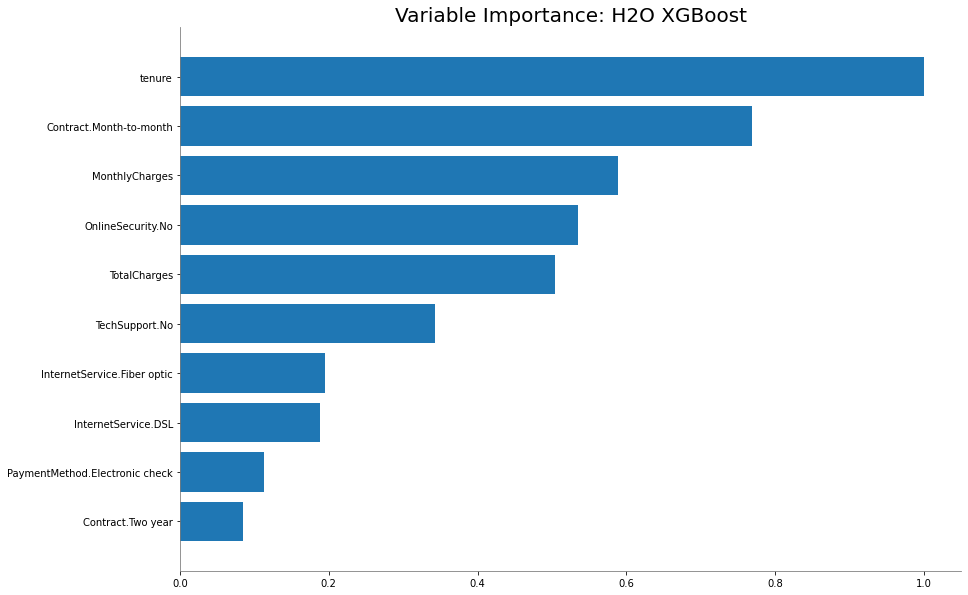

In [26]:
out.varimp_plot()

In [27]:
aml.leader.download_mojo(path = "./")

'/content/GBM_1_AutoML_1_20211208_44644.zip'

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [ ]:
import pandas as pd
churn_df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
churn_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:

churn_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
from h2o.automl import H2OAutoML
churn_train, chrun_test, churn_valid = churn_df.split_frame(ratios = [.7, .15])

AttributeError: ignored

In [ ]:
from h2o.automl import H2OAutoML